In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
%autosave 20

Autosaving every 20 seconds


# 통계량의 분포

## 모집단과 표본

- 자료분석의 목적은 모집단에 대한 특성 파악을 위한 것임.
- 관심있는 모집단의 크기가 너무 커서 자료를 조사할 수 없음.
- 따라서 모집단의 일부분인 표본을 추출하고 추출된 표본에서 얻은 정보, 즉 표본 통계량을 이용하여 모집단의 특성을 추론

## 예시 - 선거 여론조사

- 목적
    - 모든 선거구 주민($P$,population)의 후보 A에 대한 모집단의 지지율 파악

- 모집단의 특성 (관심있음)
    - 후보 A에 대한 지지율


$$\text{모집단의 지지율} = \frac{\text{모집단에서 후보 A를 지지하는 사람의 수}}{모집단에 속한 사람의 수}$$

- 근데 이걸 조사할 수 있음? NONO, 너무 커서 절대 불가능 함
- 따라서 표본을 추출하고 표본 지지율로 모집단의 지지율에 대한 정보를 얻음.

$$\text{표본 지지율} = \frac{표본에서 후보 A를 지지하는 사람의 수}{표본에 속한 사람의 수}$$

### 용어정리

|용어|기호|정의|예|
|---|---|---|---|
|모집단(population)|P|관심이 있는 전체집단|모든 선거구 주민|
|모집단의 수 |N|전체집단에 속한 개체 수|모든 선거구 주민의 수|
|모수(parameter) |$\theta$|모집단의 특성값|모집단의 지지율|
|표본(sample) |S|모집단의 부분 집합|표본으로 추출된 주민|
|표본의 수|n|표본에 속한 개체의 수|표본으로 추출된 선거구 주민의 수|
|표본 통계량(sample statistics)|$\hat{\theta}$|표본의 특성값|표본 지지율|

- 모수(parameter)는 모집단의 특성을 나타내는 값으로 분석의 목적에 따라 다양하다.
    - e.g. 
        - 전북대학교 남학생의 키를 분석하는 것이 목적 $\to$ 모수는 평균
        - A후보의 지지율을 분석하는 것이 목적 $\to$ 모수는 비율
- 표본 통계량(sample statistics)은 표본의 특성을 나타내는 값이다.
    - 추정량(estimator) 또는 검정 통계량이라고 부르기도 한다.

## 모집단?표본?

### 모집단

- 모집단이 아래와 같다고 하자.

$$P = \text{{철수,영이,둘리,흥민,연경}},N=5$$

- 관심있는 모수 $\theta$ : 후보 A에 대한 지지율

$$\theta = \frac{\text{모집단에서 후보 A를 지지하는 사람의 수}}{\text{모집단에 속한 사람의 수}}$$

- 모집단에 속한 5명이 선거 후보 A에 대한 지지 여부...
    - 철수 = 지지 = ($x=1$)
    - 영이 = 지지 = ($x=1$)
    - 둘리 = 지지 = ($x=0$)
    - 흥민 = 지지 = ($x=0$)
    - 철수 = 지지 = ($x=1$)

- 이와 같은 경우 모집단 지지율 $\theta$는 다음과 같다.

$$\theta = \frac{3}{5} = 0.6$$

### 표본

- 5명의 모집단에서 단순임의추출로 3명의 표본을 비복원추출하는 경우를 생각해 보자.
- 지지하면 $x_i = 1$ 지지하지 않으면 $x_i = 0$이라고 하자.
- 표본지지율은?

$$\hat\theta = \frac{표본에서 후보 A를 지지하는 사람의 수}{표본에 속한 사람의 수} = \frac{\sum_{i=1}^{3}x_i}{n} = \bar x$$

- 크기가 5인 모집단에서 크기가 3인 표본을 추출 할 때, 모든 가능한 표본은 몇 개일까? $\to$ 조합으로 계산

$${{N}\choose{n}}  ={{5}\choose{3}} = \frac{(5)(4)(3)}{(3)(2)(1)} = 10$$

- 5명의 사람들로 구성된 모집단에서 나타날 수 있는 모든 경우의 표본을 계산해보자.

In [2]:
from itertools import combinations

P = ['철수', '영이', '둘리', '흥민', '연경'] 

N = len(P)
n = 3

all_possible_samples = []
all_possible_samples_text = []

for sample in combinations(P, n):
  all_possible_samples.append(sample)
  txt = ""
  for i,name in enumerate(sample):
    if i == len(sample) -1:
      txt += name
    else:
      txt+= name + ","
  all_possible_samples_text.append(txt)
all_possible_samples_text

['철수,영이,둘리',
 '철수,영이,흥민',
 '철수,영이,연경',
 '철수,둘리,흥민',
 '철수,둘리,연경',
 '철수,흥민,연경',
 '영이,둘리,흥민',
 '영이,둘리,연경',
 '영이,흥민,연경',
 '둘리,흥민,연경']

In [3]:
all_possible_num = len(all_possible_samples)
all_possible_num

10

## 통계량의 정확한 분포

- 우리가 궁극적으로 알고자 하는 것은 모집단의 특성값인 모수이다.
- 통계학에서는 표본으로부터 계산하는 표본통계량으로 부터 모수를 추정한다.
    - 그러므로 표본통계량 자체의 성질,특징에 대해 이해하는 것 자체가 중요하다.
        - 좀 더 상세히 하자면 표본통계량은 표본이 임의적(random)으로 추출되기에 임의성(randomness)를 가지는 확률변수이므로
        - 표본통계량(확률변수)의 확률분포를 파악하여 확률적 성질,특징을 파악하는 것이 중요하다.
    - 뿐만아니라 추후에 나올 방법들은 확률적 성질,특징을 통해 모수를 추정한 방법이 얼마나 합리적인지 판단에 도움을 준다.
- 그렇기에 우리는 표본통계량의 분포를 알아야 한다.

- 목적 : 표본통계량은 모수를 적절히 추정하는데 핵심이다. 이것이 갖는 성질,특징을 잘 파악하여 합리적인 추정을 하기위해 표본통계량의 분포를 구해보자.

- 따라서 표본으로부터 계산한 표본통계량도 random하며 확률변수이다.
- 그렇다면 표본 통계량의 분포는 어떻게 되는가?
    1. 가능한 모든 표본통계량의 값과
    2. 각각의 값에 대응하는 확률을 알아야 한다.

**(가능한 모든 표본 통계량의 값 구하기)**

In [8]:
from fractions import Fraction

support = {'철수':1, '영이':1, '둘리':0, '흥민':0, '연경':1}
sample_rate = []
for i,sample in enumerate(all_possible_samples):
  total = 0
  for obj in sample:
    total += support[obj]
  sample_rate.append(Fraction(total,3))

sample_rate

[Fraction(2, 3),
 Fraction(2, 3),
 Fraction(1, 1),
 Fraction(1, 3),
 Fraction(2, 3),
 Fraction(2, 3),
 Fraction(1, 3),
 Fraction(2, 3),
 Fraction(2, 3),
 Fraction(1, 3)]

In [20]:
from itertools import combinations
P = ['철수', '영이', '둘리', '흥민', '연경'] 

N = len(P)
n = 3

all_possible_samples = []

for sample in combinations(P, n):
    all_possible_samples.append(sample)

all_possible_samples
P = np.array([1,1,0,0,1]) 
n=3

all_possible_samples = []
for sample in combinations(P, n):
    all_possible_samples.append(sample)

all_possible_samples

sample_rate = []

for sample in all_possible_samples:
  sample_rate.append(Fraction(int(sum(sample)),n))

sample_rate

sample_rate_dist = pd.DataFrame({'sample_rate':sample_rate, 'probability': np.repeat(1/all_possible_num, all_possible_num)})
sample_rate_dist

sample_rate_dist.groupby(by=sample_rate).sum().reset_index().rename(columns = {'index':'sample_rate'})

,sample_rate,probability
0,1/3,0.3
1,2/3,0.6
2,1,0.1


**(각각의 표본통계량에 대응하는 확률 구하기)**
- 아래의 데이터 프레임은 가능한 모든 표본으로부터 계산한 통계량과 각각의 표본이 뽑힐 수 있는 확률을 나타낸다.


In [5]:
sample_rate_dist = pd.DataFrame({"sample(outcome)" : all_possible_samples_text, "sample_rate" : sample_rate,"prob" : [0.1 for i in range(len(sample_rate))]})
sample_rate_dist

,sample(outcome),sample_rate,prob
0,"철수,영이,둘리",2/3,0.1
1,"철수,영이,흥민",2/3,0.1
2,"철수,영이,연경",1,0.1
3,"철수,둘리,흥민",1/3,0.1
4,"철수,둘리,연경",2/3,0.1
5,"철수,흥민,연경",2/3,0.1
6,"영이,둘리,흥민",1/3,0.1
7,"영이,둘리,연경",2/3,0.1
8,"영이,흥민,연경",2/3,0.1
9,"둘리,흥민,연경",1/3,0.1


- 크기가 5인 모집단에서 크기가 3인표본을 추출할 때, 특정한 하나의 표본이 추출될 확률(단,단순임의추출을 했다고 가정)?
  - 1. 가능한 표본이 ${10}\choose{3}$ = 10이고 
  - 2. 단순임의추출 : 각표본을 추출할 확률은
  모두 동일하므로 $0.1$


$$
\begin{aligned}
&P(철수,영이,둘리) = P(철수,영이,연경) = \dots = P(둘리,흥민,연경) = 1 \\
&\Leftrightarrow10P = 1 \\
&\Leftrightarrow P = 0.1
\end{aligned}
$$



- 확률과정론으로부터 얻은 지식...
  - $P(\hat{\theta} = \frac{2}{3}) = P(\{\omega : \hat{\theta}^{-1}(\omega) = \frac{2}{3} \})= 0.6$
    - i.e. 표본통계량 = $\frac{2}{3}$이 가능한 outcome(sample)은 총6가지 경우이며 확률은 각각 1이므로 $6 \times 0.1 = 0.6$ 
  - $P(\hat{\theta} = 1) = P(\{\omega : \hat\theta^{-1}(\omega) =1\}) = 0.1$
    - i.e.(표본통계량 = $1$이 가능한 outcome은 1가지 경우여서 확률은 0.1
  - $P(\hat{\theta} = \frac{1}{3}) = P(\{\omega : \hat{\theta}^{-1}(\omega) = \frac{1}{3} \})= 0.3$
    - i.e. 표본통계량 = $\frac{1}{3}$이 가능한 outcome(sample)은 총3가지 경우이며 확률은 각각 1이므로 $3 \times 0.1 = 0.3$ 


- 따라서 정확한 $\hat\theta$의 분포는
  

|$\hat\theta$|$\frac{1}{3}$|$\frac{2}{3}$|1|
|---|---|---|---|
|$P$|0.3|0.6|0.1|

## 통계량의 경험적 분포

- 사실 통계량의 정확한 분포를 구하는 것은 불가능하다.
  - 실제 문제에서는 모집단을 정확히 모르며 하나의 표본이 주어지기 떄문이다.(대부분) $\to$ 따라서 단순임의추출을 통해 가능한 sample(outcome)을 모두 아는 것이 불가능
  - 정확히 안다고 가정해도 모집단의 크기가 너무 크면 불가능하다. $\to$ 가능한 모든 sample(outcome)의 조합이 너무 많기에 연산복잡도가 너무 크다.
- 일단 이 포스팅에서는 모집단은 정확히 알고 크기가 너무 큰 경우에 통계량의 분포를 구해보는 과정을 다룬다.
- 모집단의 크기가 너무 크다.<br>$\to$ 가능한 모든 표본의 수가 ${N}\choose{n}$ 개이다. <br>$\to$ 가능한 모든 표본으로부터 통계량을 구하는 것은 컴퓨터로도 처리하기 어렵다
- 정확한 표본통계량의 분포를 구하기 힘드니까 근사적으로라도 구할 수 없을까?

- 목적 
  - 표본통계량의 정확한 분포는 구할 수 없으므로 표본통계량의 분포를 (근사적으로) 구한다.
  - 근사적으로 구한 분포로부터 표본통계량의 확률적 성질,특징을 알아볼 수 있다.
- How? : 경험적 분포를 구한다.

**(경험적 분포를 구하는 과정)**<br>
- 문제 : 모집단의 크기 N = 10000이고 표본의 크기 n=100으로 할 때, 표본통계량(지지율)의 분포는 어떻게 되는가?
  1. 모집단으로 부터 크기가 100인 표본을 `임의추출` 한다.(기억,랜덤샘플링,임의추출)
  2. 표본으로부터 표본통계량 $\hat\theta$을 계산하고 기록한다.
  3. 1,2,를 여러번 반복한다.
    - 일반적으로 500이상
    - 예를 들어 500번 반복하면 $\hat\theta_1,\hat\theta_2,\hat\theta_3...\hat\theta_{500}$을 얻었을 것이다.
  4. 위에서 얻은 여러 개의 표본통계량으로 부터 경험적 분포를 구한다.




- 위와 같은 과정을 모의실험이라고 하며 모의실험을 통하여 얻은 분포를 `경험적 분포`라 한다.
- 표본통계량의 경험적 분포는 정확한 분포와 매우 유사하다. 
- 따라서 표본통계량의 정확한 분포를 구할 수 없는 경우 표본통계량의 경험적 분포를 통하여 확률적 성질,특징을 알아볼 수 있다.

### 구현

- 지지율이 60%인 모집단이 있다고 할 때
- 모의실험을 통해 크기가 100인 표본지지율의 경험적 분포를 구해보자.

In [6]:
# 모집단을 만든다.
P = np.concatenate((np.ones(6000), np.zeros(4000)), axis=0)
np.mean(P)

0.6

- 모집단 $P$는 np.array이다.
- 따라서 단순임의추출하려면 np.random.choice사용

In [7]:
B=1000
n=100

simulation_sample_rate = pd.DataFrame({"sample_rate":np.zeros(B)})
for i in np.arange(B):
  sample = np.random.choice(P,n,replace=False)
  simulation_sample_rate.loc[i,"sample_rate"] = np.mean(sample)
simulation_sample_rate

,sample_rate
0,0.64
1,0.60
2,0.60
3,0.60
4,0.58
...,...
995,0.62
996,0.64
997,0.68
998,0.60


### 확인

<AxesSubplot:ylabel='Frequency'>

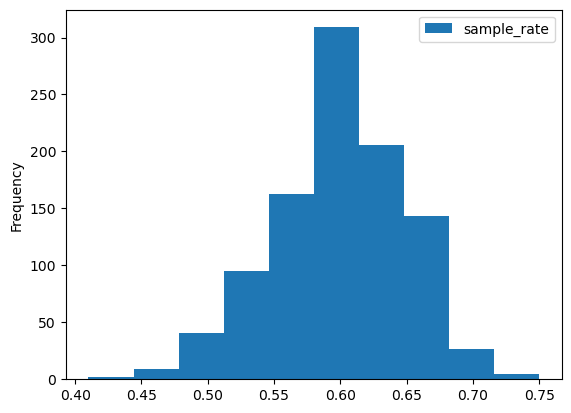

In [156]:
simulation_sample_rate.plot.hist()

<AxesSubplot:>

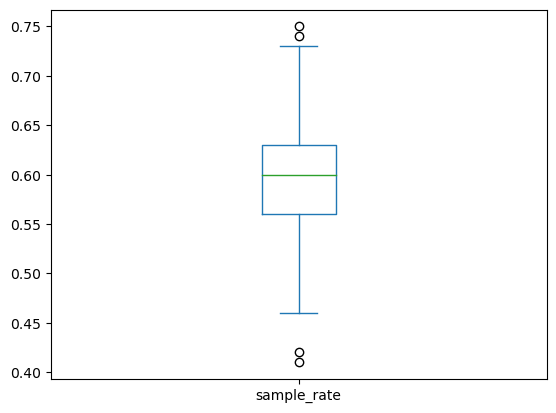

In [157]:
simulation_sample_rate.plot.box()

# 예제 : 공공자전거 자료에서 표본평균의 분포

In [158]:
url1 = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_bike_201909_3.csv"
bike = pd.read_csv(url1, encoding="CP949")

In [159]:
bike.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-17003,2019-09-28 16:10:55,368,SK 서린빌딩 앞,4,2019-09-28 17:03:32,2002,노들역 1번출구,14,52,8940.0
1,SPB-14405,2019-09-28 16:48:16,2024,상도역 1번출구,3,2019-09-28 17:03:44,2002,노들역 1번출구,18,15,1910.0
2,SPB-18431,2019-09-28 16:59:54,2002,노들역 1번출구,10,2019-09-28 17:03:57,2002,노들역 1번출구,10,2,30.0
3,SPB-04853,2019-09-28 15:31:49,207,여의나루역 1번출구 앞,32,2019-09-28 17:10:12,2002,노들역 1번출구,19,98,9610.0
4,SPB-11122,2019-09-28 15:35:41,207,여의나루역 1번출구 앞,14,2019-09-28 17:10:37,2002,노들역 1번출구,18,90,9450.0
5,SPB-23089,2019-09-28 17:02:37,2003,사육신공원앞,5,2019-09-28 17:13:44,2002,노들역 1번출구,10,10,1410.0
6,SPB-15669,2019-09-28 16:17:54,2213,고속터미널역 5번출구 앞,7,2019-09-28 17:14:22,2002,노들역 1번출구,8,56,0.0
7,SPB-09727,2019-09-28 17:04:56,2002,노들역 1번출구,5,2019-09-28 17:17:10,2002,노들역 1번출구,17,11,380.0
8,SPB-10053,2019-09-28 16:59:45,2002,노들역 1번출구,3,2019-09-28 17:17:53,2002,노들역 1번출구,5,17,1080.0
9,SPB-14487,2019-09-28 16:01:41,2024,상도역 1번출구,5,2019-09-28 17:20:44,2002,노들역 1번출구,14,78,13870.0


In [160]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407589 entries, 0 to 407588
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   자전거번호     407589 non-null  object 
 1   대여일시      407589 non-null  object 
 2   대여 대여소번호  407589 non-null  int64  
 3   대여 대여소명   407589 non-null  object 
 4   대여거치대     407589 non-null  int64  
 5   반납일시      407589 non-null  object 
 6   반납대여소번호   407589 non-null  int64  
 7   반납대여소명    407589 non-null  object 
 8   반납거치대     407589 non-null  int64  
 9   이용시간      407589 non-null  int64  
 10  이용거리      407589 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 34.2+ MB


In [161]:
bike.describe()

,대여 대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,407589.000000,407589.000000,407589.000000,407589.000000,407589.000000,407589.000000
mean,1880.239587,7.180022,2513.636349,6.902335,30.156827,4253.336228
std,878.719112,5.262180,714.170698,4.898559,32.065934,5782.673901
min,101.000000,1.000000,2002.000000,1.000000,1.000000,0.000000
25%,1233.000000,3.000000,2177.000000,3.000000,8.000000,1200.000000
50%,2171.000000,6.000000,2303.000000,6.000000,18.000000,2380.000000
75%,2313.000000,10.000000,2619.000000,10.000000,43.000000,5130.000000
max,99999.000000,40.000000,99999.000000,39.000000,2479.000000,153490.000000


In [162]:
bike.shape

(407589, 11)

- 2019년 9월 동안 서울특별시 공공자전거 대여 이력 자료
- 2019년 9월 동안 서울특별시 공공자전거 대여 이력을 모두 모아놨으므로 `모집단`이다.
- 관심있는 모수 : 이용거리의 평균


- 공공자전거 모집단에서 표본을 simple random sampling without replacement으로 여러번 추출하는 경우에 표본통계량의 경험적 분포를 구해보자.
- 각각의 모든 표본의 크기가 최대 n=2000 개라면 표본의 크기에 비해 모집단의 크기가 상대적으로 매우 큼을 알 수 있다.
- 이때 다음과 같은 주목할 만한 사실이 있다.
    - 이 경우 비복원추출과 복원추출의 차이가 거의 없다.
        - 복원추출과 비복원추출의 차이점은 한 번 뽑힌 개체가 또다시 뽑힐 수 있느냐는 것이다.
        - 그러나 이 경우는 비복원추출을 해도 모집단이 너무 크기에 사실상 한 번 뽑힌 개체가 다시 뽑힐가능성이 매우작다.(0은 아니다.)
        - 따라서 다시 뽑힐 가능성을 0으로 두고 하는 복원추출과 이 경우의 비복원추출은 사실상 같다.

1. B = 1000, n = 50인 경우 표본비율의 경험적 분포.

In [163]:
B=1000
n=50

sample_means_50 = pd.DataFrame({"sample_means":np.zeros(B)})
for i in np.arange(B):
    sample_means_50.loc[i,"sample_means"] = bike.sample(n=n,replace=False)["이용거리"].mean() 
    #이 부분 sample하고 column index위치 바꾸면 안됨
sample_means_50

,sample_means
0,6331.6
1,3449.2
2,3372.0
3,4369.2
4,3487.6
...,...
995,4048.8
996,5155.4
997,4827.6
998,4630.6


<AxesSubplot:ylabel='Frequency'>

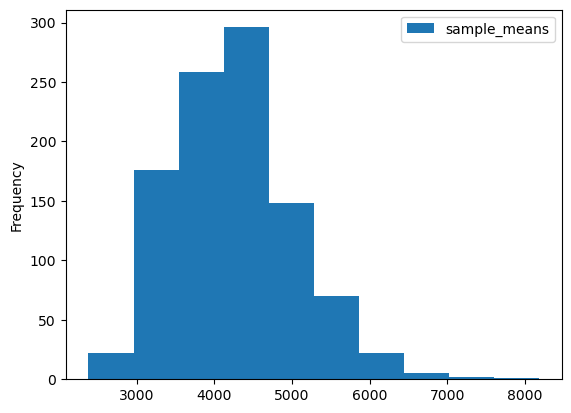

In [164]:
sample_means_50.plot.hist(y="sample_means")

<AxesSubplot:>

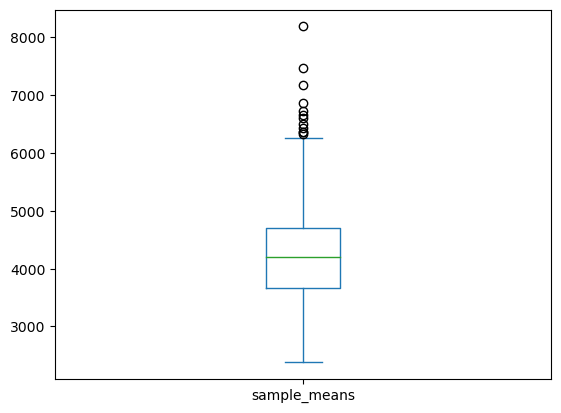

In [165]:
sample_means_50.plot.box(y="sample_means")

2. B=1000,n=1000 표본비율의 경험적 분포

In [166]:
B=1000
n=1000

sample_means_1000 = pd.DataFrame({"sample_means" : np.zeros(B)})
for i in np.arange(B):
    sample_means_1000.loc[i,"sample_means"] = bike.sample(n=n,replace=False)["이용거리"].mean()
sample_means_1000

,sample_means
0,4415.75
1,4384.23
2,4409.41
3,3903.12
4,4010.64
...,...
995,4464.98
996,4361.14
997,4693.28
998,4451.37


<AxesSubplot:ylabel='Frequency'>

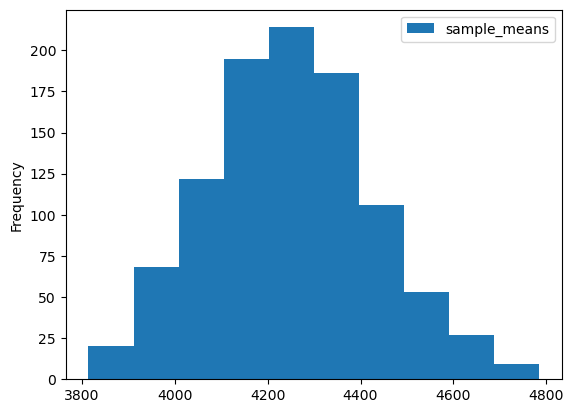

In [167]:
sample_means_1000.plot.hist(y="sample_means")

<AxesSubplot:>

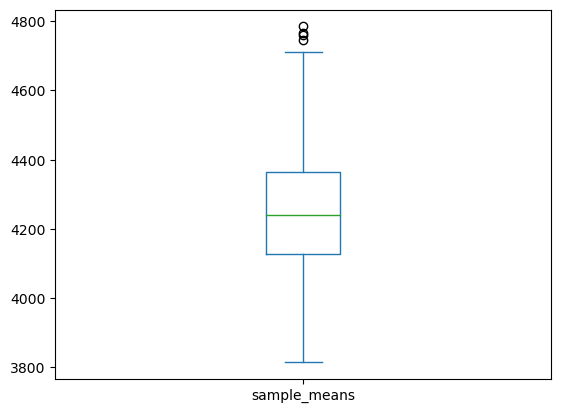

In [168]:
sample_means_1000.plot.box(y="sample_means")

$n= 50$ vs $n = 1000$

(2000.0, 9000.0)

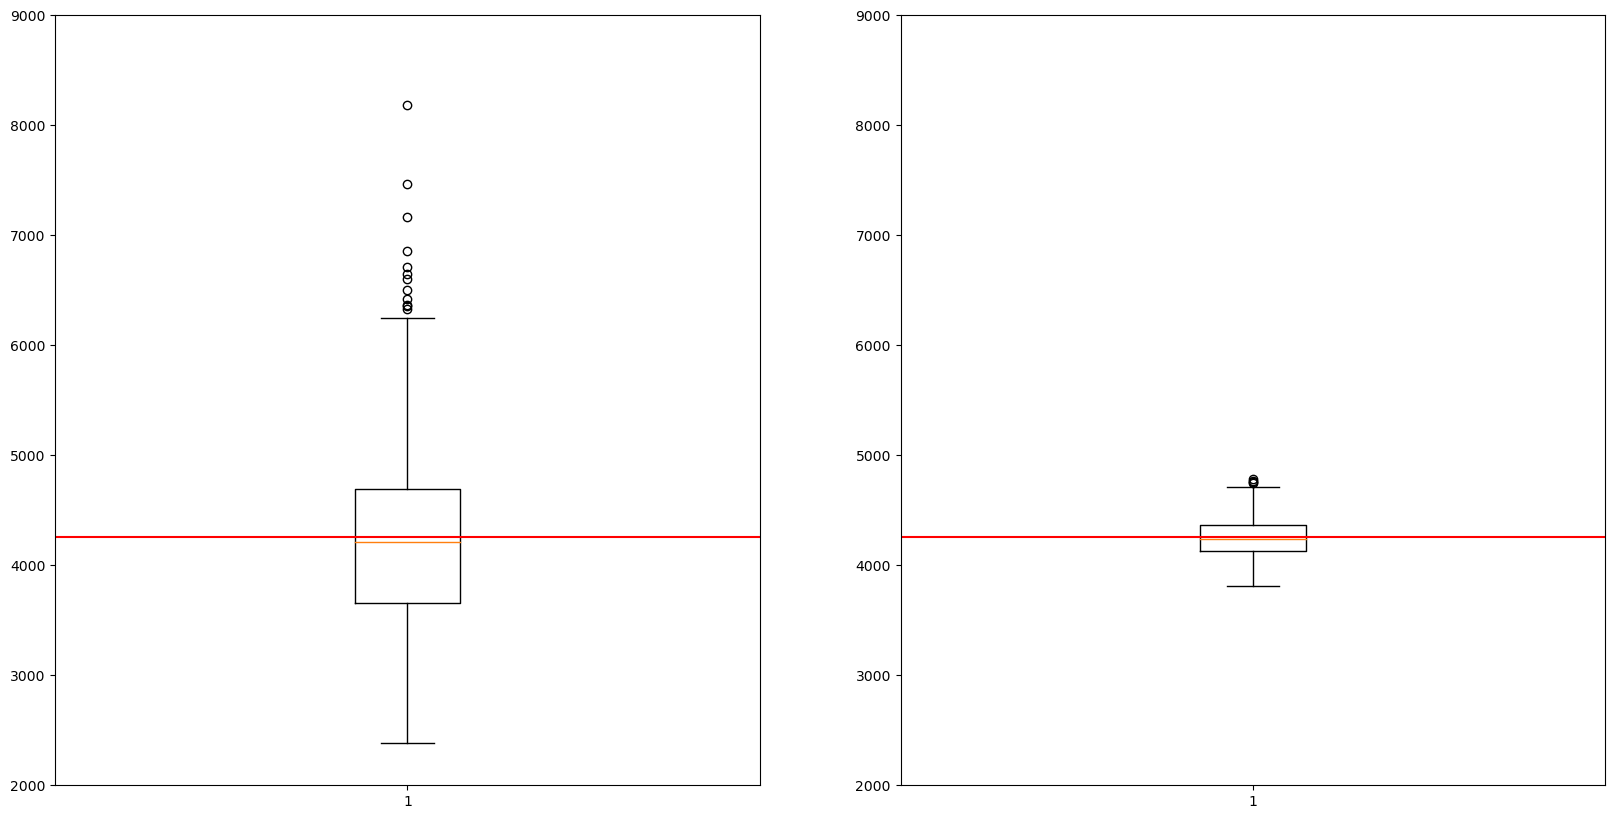

In [169]:
f,ax = plt.subplots(1,2,figsize=(20,10))

plt.subplot(1,2,1)
plt.boxplot(sample_means_50)
plt.hlines(y=4253.336228, xmin=0.5, xmax=1.5, colors='r')
plt.ylim(2000,9000)

plt.subplot(1,2,2)
plt.boxplot(sample_means_1000)
plt.hlines(y=4253.336228, xmin=0.5, xmax=1.5, colors='r')
plt.ylim(2000,9000)

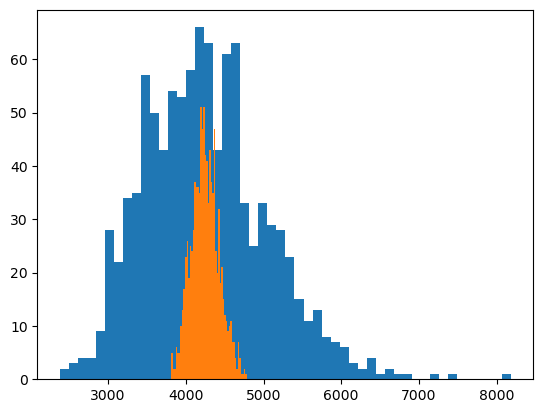

In [213]:
plt.hist(sample_means_50,bins=50)
plt.hist(sample_means_1000,bins=50)
plt.show()

- 표본의 크기가 1000인 경우 표본평균의 경험적 분포는 50인 경우보다 좌우 대칭인 종모양(정규분포)에 더 가까워 보인다.
- 표본의 크기가 1000인 경우 표본평균의 경험적 분포는 50인 경우보다 분산이 작음.

뭔가 규칙이 있는 거 같다. 표본의 크기 n이 커질수록 표본평균의 분포가 정규분포에 가깝고 분산이 적은거 같은데?<br>
프로그래밍으로 확인해보자~

In [226]:
B = 1000
sample_sizes = [10,20,100,400,900,1200,1500,1800,2000]
total_num = B * len(sample_sizes)

emprical_dists=pd.DataFrame({"sample_size" : np.zeros(total_num),"sample_means" : np.zeros(total_num)})
count = 0
for n in sample_sizes:
    for i in np.arange(B):
        emprical_dists.loc[count,"sample_means"] =  bike.sample(n=n,replace=False)["이용거리"].mean() #means아니라 mean
        emprical_dists.loc[count,"sample_size"] =  n #means아니라 mean
        count+=1
emprical_dists.head(10)

,sample_size,sample_means
0,10.0,3517.0
1,10.0,3405.0
2,10.0,4661.0
3,10.0,3394.0
4,10.0,3390.0
5,10.0,3850.0
6,10.0,4766.0
7,10.0,3616.0
8,10.0,3018.0
9,10.0,2743.0


(1000.0, 12000.0)

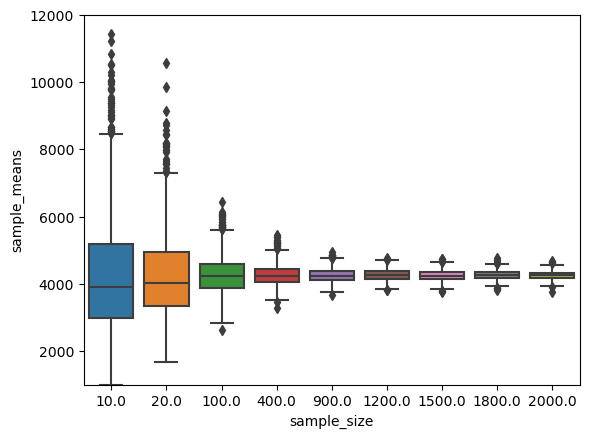

In [231]:
sns.boxplot(x=emprical_dists["sample_size"],y=emprical_dists["sample_means"])
plt.ylim(1000,12000)

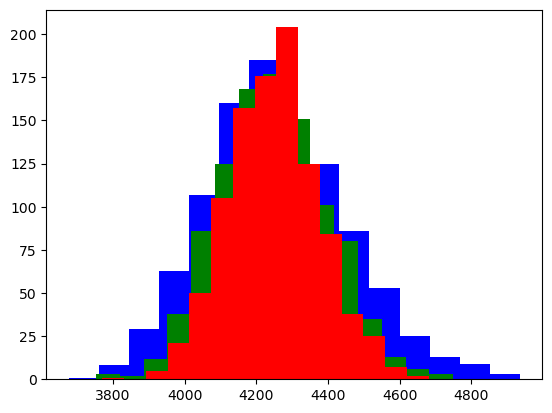

In [239]:
plt.hist(emprical_dists.loc[emprical_dists.sample_size==900,"sample_means"],color="blue",bins=15)
plt.hist(emprical_dists.loc[emprical_dists.sample_size==1500,"sample_means"],color="green",bins=15)
plt.hist(emprical_dists.loc[emprical_dists.sample_size==2000,"sample_means"],color="red",bins=15)
plt.show()

- box,hist plot으로부터
    - 1. 표본의 크기 n이 클수록 표본평균의 분포가 정규분포로 가까워 지는 것처럼 보이고
    - 2. 그때의 분산도 작아지는 것을 확인할 수 있다.
- 사실 이 정리는 중심극한정리이다..!

# 정리

- 표본통계량의 분포를 구하는 것은 중요하다.
    - 모수를 구하는데에 핵심적인 정보이기에 특징,성질을 파악해야하고
    - 추후에 나올 방법에 사용되기 때문이다.
- 하지만 정확하게 구하는데에는 한계가 있다.
    1. 실제 문제에서는 모집단을 정확히 모르며 하나의 표본이 주어지기 떄문이다.(대부분) $\to$ 따라서 단순임의추출을 통해 가능한 sample(outcome)을 모두 아는 것이 불가능
    2. 정확히 안다고 가정해도 모집단의 크기가 너무 크면 불가능하다. $\to$ 가능한 모든 sample(outcome)의 조합이 너무 많기에 연산복잡도가 너무 크다.
- 따라서 이번 포스팅에서는 모집단을 정확히 아는 경우에 한해서 정확한 분포를 근사하는 경험적분포를 통해 표본통계량의 분포를 구했다.
- 분포를 구해본 결과 그 과정에서 표본의 크기가 커질수록
    - 정규분포에 가까워지고
    - 분산이 작아졌다.
    - 이는 사실 중심극한정리(CLT)이다.
- 여기까지 이번 포스팅의 내용..
- 하지만 실제문제상황에서 우리에게 주어지는 것은 단 하나의 표본뿐이다.
- 이러한 상황에서는 표본통계량의 분포를 어떻게 구하는가? ... 다음 포스팅에서 ...